# Project Housing Agency - Sebastian Cortez

**Project Scenario:** You are a Data Scientist with a housing agency in Boston MA, you have been given access to a previous dataset on housing prices derived from the U.S. Census Service to present insights to higher management. Based on your experience in Statistics, what information can you provide them to help with making an informed decision? Upper management will like to get some insight into the following.

- Is there a significant difference in the median value of houses bounded by the Charles river or not?

- Is there a difference in median values of houses of each proportion of owner-occupied units built before 1940?

- Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town?

- What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes?

Using the appropriate graphs and charts, generate basic statistics and visualizations that you think will be useful for the upper management to give them important insight given the question they are asking, in your graphs, include an explanation of each statistic. 

In [132]:
import pandas as pd
import numpy as np
import scipy.stats as sp
import math
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from sklearn.datasets import load_boston
import statsmodels.api as sm

In [37]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [38]:
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


In [39]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


# Generate Descriptive Statistics and Visualizations

### For the "Median value of owner-occupied homes" provide a **boxplot**

Text(0.5, 0, "Median value of owner-occupied homes in $1000's")

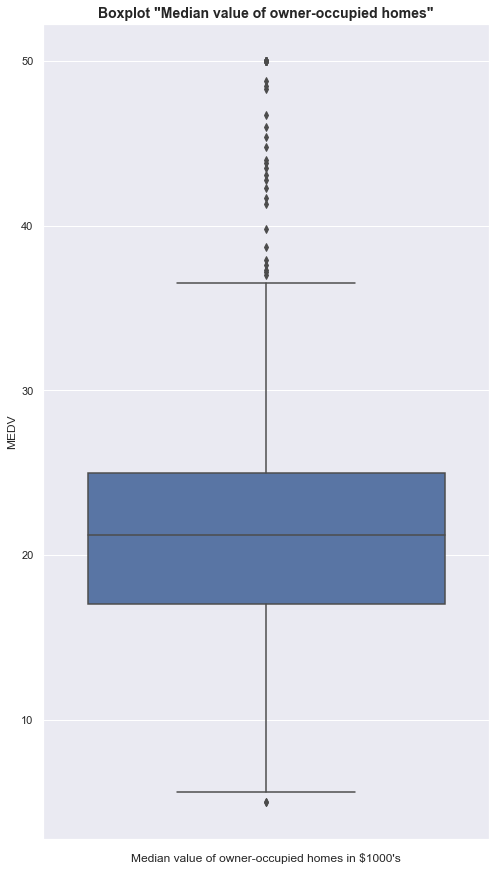

In [130]:
sns.set_theme(style = "darkgrid")
sns.set(rc = {'figure.figsize':(8,15)})
ax = sns.boxplot(y = boston_df["MEDV"])
plt.title('Boxplot "Median value of owner-occupied homes"', fontsize=14, fontweight='bold')
plt.xlabel('Median value of owner-occupied homes in $1000\'s')

### Provide a **histogram** for the Charles river variable

Text(0.5, 0, 'Charles River Houses')

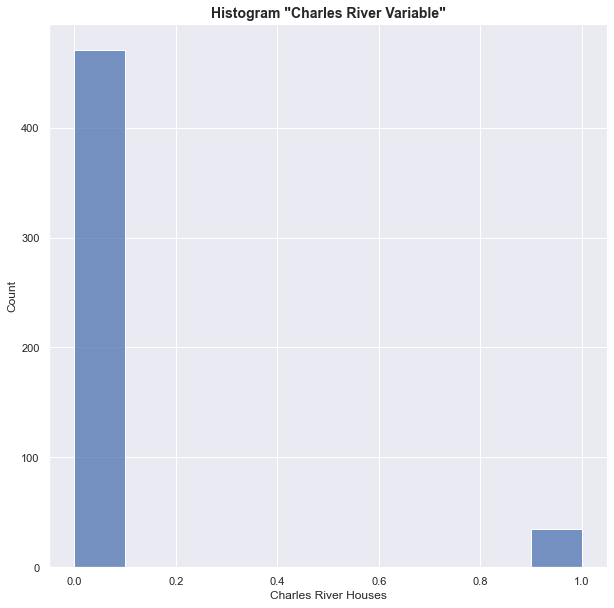

In [128]:
sns.set_theme(style = "darkgrid")
sns.set(rc = {'figure.figsize':(10,10)})
ax1 = sns.histplot(boston_df['CHAS'])
plt.title('Histogram "Charles River Variable"', fontsize=14, fontweight='bold')
plt.xlabel('Charles River Houses')

### Provide a **boxplot** for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

In [82]:
boston_df.loc[(boston_df['AGE'] <= 35), 'Age Group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'Age Group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] > 70), 'Age Group'] = '70 years and older'

Text(0.5, 0, "Median value of owner-occupied homes in $1000's")

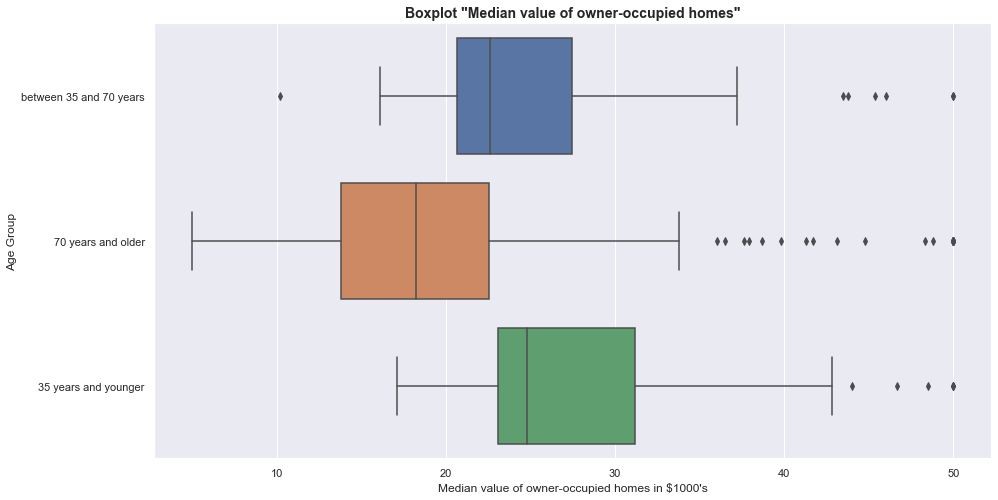

In [90]:
sns.set_theme(style = "darkgrid")
sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.boxplot(x = boston_df["MEDV"], y = boston_df["Age Group"])
plt.title('Boxplot "Median value of owner-occupied homes"', fontsize=14, fontweight='bold')
plt.xlabel('Median value of owner-occupied homes in $1000\'s')

### Provide a **scatter plot** to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

Text(0, 0.5, 'Proportion of non-retail business acres per town (INDUS)')

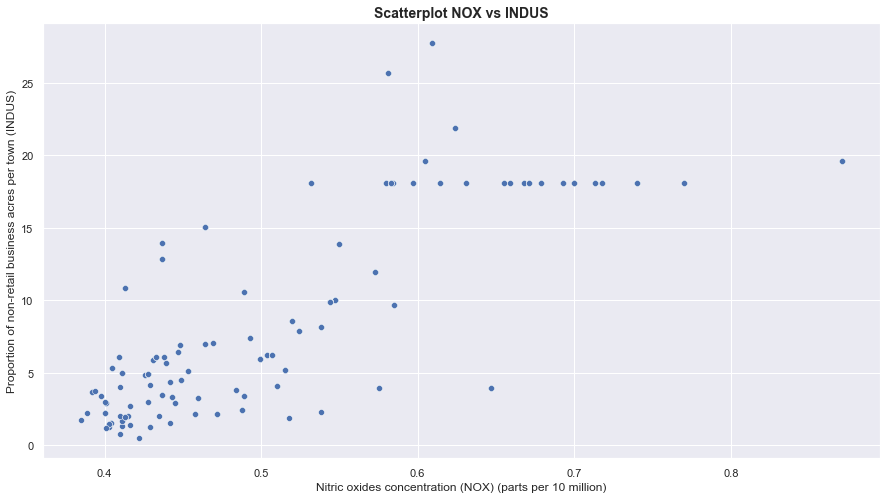

In [138]:
sns.set_theme(style = "darkgrid")
sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.scatterplot(x = boston_df["NOX"], y = boston_df["INDUS"])
plt.title('Scatterplot NOX vs INDUS', fontsize=14, fontweight='bold')
plt.xlabel('Nitric oxides concentration (NOX) (parts per 10 million)')
plt.ylabel('Proportion of non-retail business acres per town (INDUS)')

### Create a **histogram** for the pupil to teacher ratio variable

Text(0.5, 0, 'pupil-teacher ratio by town (PTRATIO)')

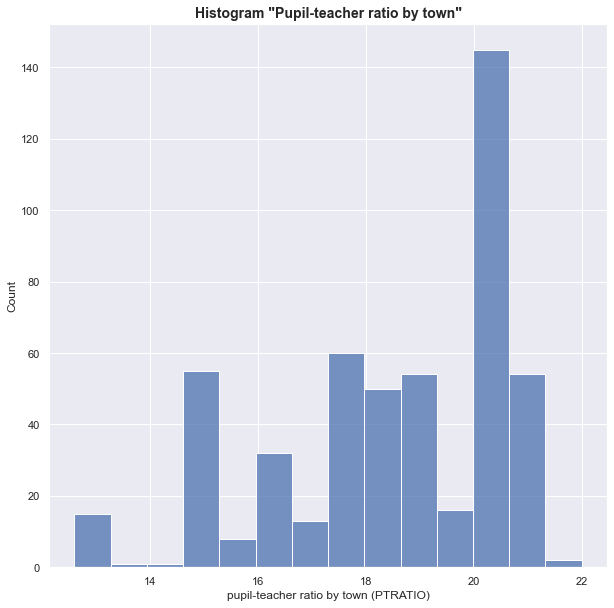

In [129]:
sns.set_theme(style = "darkgrid")
sns.set(rc = {'figure.figsize':(10,10)})
ax1 = sns.histplot(boston_df, x="PTRATIO")
plt.title('Histogram "Pupil-teacher ratio by town"', fontsize=14, fontweight='bold')
plt.xlabel('pupil-teacher ratio by town (PTRATIO)')

# Use the appropriate tests to answer the questions provided

1. State your hypothesis.

2. Use α = 0.05

3. Perform the test Statistics.

4. State the conclusion from the test.

### **Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)**

*H<sub>0</sub>*: Variance is equal

*H<sub>a</sub>*: Variance is not equal

In [112]:
sp.levene(boston_df[boston_df['CHAS'] == 0.0]['MEDV'],
          boston_df[boston_df['CHAS'] == 1.0]['MEDV'], center = 'mean')

LeveneResult(statistic=8.751904896045998, pvalue=0.003238119367639829)

*H<sub>0</sub>*: Median value of houses bounded by the Charles river or not, are similar

*H<sub>a</sub>*: Median value of houses bounded by the Charles river or not, are not similar

In [113]:
sp.ttest_ind(boston_df[boston_df['CHAS'] == 0.0]['MEDV'],
          boston_df[boston_df['CHAS'] == 1.0]['MEDV'], equal_var = False)

Ttest_indResult(statistic=-3.113291312794837, pvalue=0.003567170098137517)

**Conclusion:** Assuming $\alpha$=0.05, the p-value of the t-test allows us to reject the null hypothesis, meaning that there is statistical difference between the median value of houses by the Charles river vs the ones that are not by the river

### **Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)**

*H<sub>0</sub>*: Variance is equal

*H<sub>a</sub>*: Variance is not equal

In [121]:
sp.levene(boston_df.loc[boston_df['Age Group'] == '35 years and younger']['MEDV'],
          boston_df.loc[boston_df['Age Group'] == 'between 35 and 70 years']['MEDV'],
          boston_df.loc[boston_df['Age Group'] == '70 years and older']['MEDV'],
          center='mean')

LeveneResult(statistic=2.780620029374844, pvalue=0.06295337343259205)

We fail to reject the null hypothesis, which means variances are equal and we can move along with an ANOVA test

*H<sub>0</sub>*: Median value of houses are similar for every age group

*H<sub>a</sub>*: Median value of houses are not similar for every age group

In [117]:
thirtyfive_lower = boston_df.loc[boston_df['Age Group'] == '35 years and younger']['MEDV']
thirtyfive_seventy = boston_df.loc[boston_df['Age Group'] == 'between 35 and 70 years']['MEDV']
seventy_higher = boston_df.loc[boston_df['Age Group'] == '70 years and older']['MEDV']

In [119]:
sp.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_higher)

F_onewayResult(statistic=36.40764999196599, pvalue=1.7105011022702984e-15)

**Conclusion:** Assuming $\alpha$=0.05, the p-value of the t-test allows us to reject the null hypothesis, meaning that there is statistical difference in the mean value of houses between age groups

### **Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)**

*H<sub>0</sub>*: There is no association between Nitric oxide concentrations and proportion of non-retail business acres per town

*H<sub>a</sub>*: There is an association between Nitric oxide concentrations and proportion of non-retail business acres per town

In [122]:
sp.pearsonr(boston_df['NOX'], boston_df['INDUS'])

(0.763651446920916, 7.913361061231497e-98)

**Conclusion:** Assuming $\alpha$=0.05, the p-value of the t-test allows us to reject the null hypothesis, meaning that there is a correlation between nitric oxide concentrations and proportion of non-retail acres per town

### **What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)**

*H<sub>0</sub>*: There is no impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes

*H<sub>a</sub>*: There is an impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes

In [136]:
x = boston_df['DIS']
y = boston_df['MEDV']

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predictions = model.predict(x)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sat, 21 Aug 2021   Prob (F-statistic):           1.21e-08
Time:                        12:16:07   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='DIS', ylabel='MEDV'>

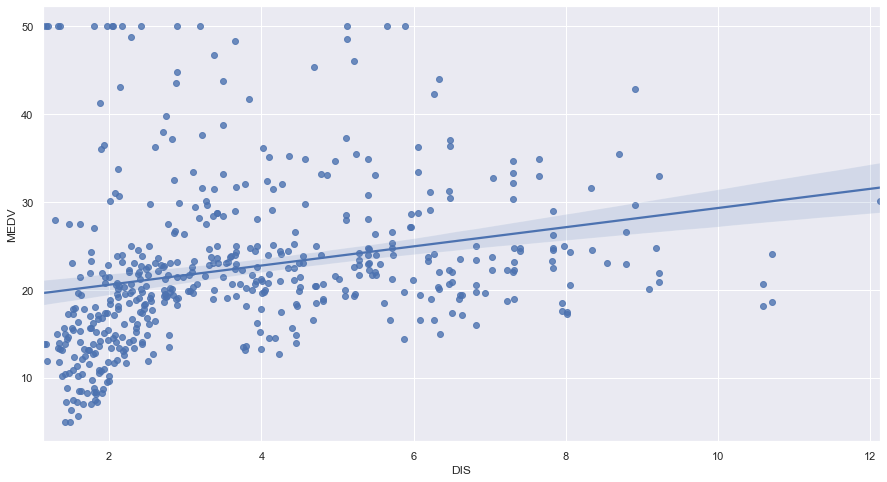

In [141]:
sns.regplot(x = "DIS", y = "MEDV", data = boston_df)

**Conclusion:** Assuming $\alpha$=0.05, the p-value of the regression model indicates that we have to reject the null hypothesis, which mean that there is an impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes